In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Cleaned Data.xlsx')

In [3]:
# show the first 2 rows
df.head(2)

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop


In [4]:
# show the dimensions
df.shape

(334, 31)

In [5]:
# drop the unncessary columns
columns_to_drop=['Region','Education','I have my regular access to the internet','I am currently employed at least part-time','I am on section 8 housing','I receive food stamps','Annual income from social welfare programs','I have a gap in my resume','Total length of any gaps in my resume in\xa0months.','Household Income','Device Type']
df.drop(columns=columns_to_drop,inplace=True)

In [6]:
# new shape
df.shape

(334, 20)

In [7]:
# change annual income to rupees
df['Annual income (including any social welfare programs) in Rupee']=df['Annual income (including any social welfare programs) in USD']*70
df.drop('Annual income (including any social welfare programs) in USD',axis=1,inplace=True)

In [8]:
df.head(2)

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,1,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540


In [9]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

df['Age'] = df['Age'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else int(x) if x.isdigit() else 60)



/var/folders/3z/fqb6bcs175sctmldfm6y7nr80000gn/T/ipykernel_13365/670604197.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [10]:
# info of the new dataset
df.head(2)

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,37.0,1,2450
1,1,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23.5,1,1540


In [ ]:
# if education, age or gender is null , drop it , else fill with median
for i in df:
    if i=='Age' or i=='Gender':
        df[i].dropna()
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [12]:
# make y as result and drop it from df
y=df['I identify as having a mental illness']
df.drop('I identify as having a mental illness',axis=1,inplace=True)

In [14]:
df.head(10)

,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,37.0,1,2450
1,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23.5,1,1540
2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,7000
3,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,0
4,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37.0,1,2240
5,1,0,0.0,0,1,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,0
6,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,23.5,1,70
7,1,0,0.0,0,1,0,1,0,1.0,1,1,0.0,0.0,1.0,1.0,1.0,23.5,1,770
8,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,0.0,0.0,1.0,37.0,1,5110
9,1,0,0.0,0,0,0,1,0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,37.0,1,840


In [ ]:
# encode education , age and gender

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   I have my own computer separate from a smart phone              334 non-null    int64  
 1   I have been hospitalized before for my mental illness           334 non-null    int64  
 2   How many days were you hospitalized for your mental illness     334 non-null    float64
 3   I am legally disabled                                           334 non-null    int64  
 4   I live with my parents                                          334 non-null    int64  
 5   I am unemployed                                                 334 non-null    int64  
 6   I read outside of work and school                               334 non-null    int64  
 7   How many times were you hospitalized for your mental 

In [16]:
# mean and std deviation
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df2=ss.fit_transform(df)

In [42]:
df2.shape

(334, 19)

In [18]:
X=df.values

In [19]:
# split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

(267, 19) (267,)


In [20]:
# use logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
# fit training data
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [45]:
y_pred=lr.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is {accuracy_lr * 100}%')

Accuracy of the model is 88.05970149253731%


'\nTP FP\nFN TN\n'

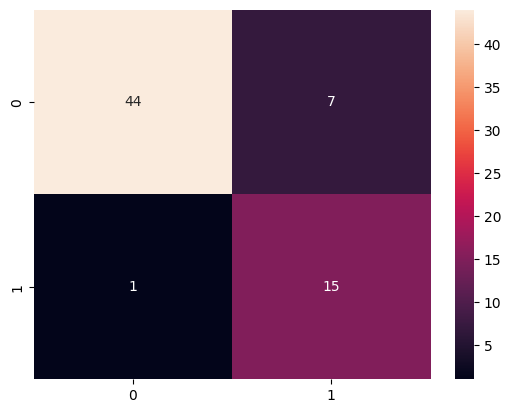

In [47]:
import seaborn as sns
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)
'''
TP FP
FN TN
'''

In [55]:
custom_input = {
    'I have my own computer separate from a smart phone': 1,  # Example value (1 for yes, 0 for no)
    'I have been hospitalized before for my mental illness': 0,  # Example value (1 for yes, 0 for no)
    'How many days were you hospitalized for your mental illness': 0,  # Example value
    'I am legally disabled': 0,  # Example value (1 for yes, 0 for no)
    'I live with my parents': 1,  # Example value (1 for yes, 0 for no)
    'I am unemployed': 1,  # Example value (1 for yes, 0 for no)
    'I read outside of work and school': 1,  # Example value (1 for yes, 0 for no)
    'How many times were you hospitalized for your mental illness': 0,  # Example value
    'Lack of concentration': 1.0,  # Example value
    'Anxiety': 1,  # Example value (1 for yes, 0 for no)
    'Depression': 1,  # Example value (1 for yes, 0 for no)
    'Obsessive thinking': 0.0,  # Example value
    'Mood swings': 1,  # Example value
    'Panic attacks': 1,  # Example value
    'Compulsive behavior': 1.0,  # Example value
    'Tiredness': 0.0,  # Example value
    'Age': 34,  # Example value (age category)
    'Gender': 1,  # Example value (0 for Male, 1 for Female)
    'Annual income (including any social welfare programs) in Rupee': 500000  # Example value
}

# Create a DataFrame from custom input
custom_df = pd.DataFrame(custom_input, index=[0])
custom_df_scaled = ss.transform(custom_df)

custom_prediction = lr.predict(custom_df_scaled)
custom_prediction_probability = lr.predict_proba(custom_df_scaled)[:, 1]  # Probability of positive class (having mental illness)

# Output prediction and probability
if custom_prediction == 1:
    print("The model predicts that the user is likely to identify as having a mental illness.")
else:
    print("The model predicts that the user is unlikely to identify as having a mental illness.")

print("Probability of identifying as having a mental illness:", custom_prediction_probability)


The model predicts that the user is likely to identify as having a mental illness.
Probability of identifying as having a mental illness: [0.99948096]


In [29]:
df.head(10)

,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,37.0,1,2450
1,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23.5,1,1540
2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,7000
3,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,0
4,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37.0,1,2240
5,1,0,0.0,0,1,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,0
6,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,23.5,1,70
7,1,0,0.0,0,1,0,1,0,1.0,1,1,0.0,0.0,1.0,1.0,1.0,23.5,1,770
8,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,0.0,0.0,1.0,37.0,1,5110
9,1,0,0.0,0,0,0,1,0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,37.0,1,840


In [30]:
# Use random forest now

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have train_data and test_data and their corresponding labels as y_train and y_test

# Create a decision tree classifier
model = DecisionTreeClassifier(criterion='gini')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Accuracy of the decision tree model is {accuracy_dt * 100:.2f}%')


Accuracy of the decision tree model is 89.55%


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have train_data and test_data and their corresponding labels as y_train and y_test

# Create a decision tree classifier
model = DecisionTreeClassifier(criterion='entropy')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the decision tree model is {accuracy * 100:.2f}%')


Accuracy of the decision tree model is 85.07%


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have train_data and test_data and their corresponding labels as y_train and y_test

# Create a decision tree classifier
model = DecisionTreeClassifier(criterion='log_loss')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the decision tree model is {accuracy * 100:.2f}%')


Accuracy of the decision tree model is 88.06%


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Naive Bayes model is {accuracy_nb * 100:.2f}%')


Accuracy of the Naive Bayes model is 86.57%


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a Support Vector Classifier wih linear kernel
model = SVC(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM model is {accuracy_svm * 100:.2f}%')


Accuracy of the SVM model is 86.57%


Text(0.5, 1.0, 'Accuracy of Different Models')

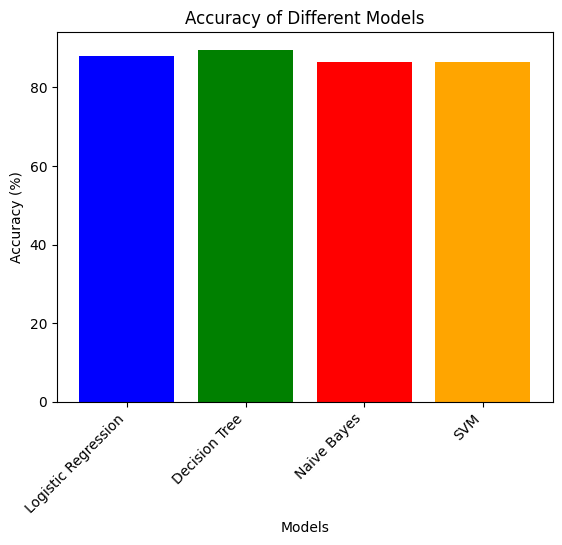

In [36]:
import matplotlib.pyplot as plt

# Your list of data
data = [accuracy_lr, accuracy_dt, accuracy_nb, accuracy_svm]
data = [accuracy * 100 for accuracy in data]

# Define the models corresponding to each data point
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM']

# Define colors for each bar
colors = ['blue', 'green', 'red', 'orange']

# Plot the bar plot
x_indices = range(1, len(data) + 1)
plt.bar(x_indices, data, color=colors)

# Add custom x-labels
plt.xticks(x_indices, models, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')


In [37]:
for model, accuracy in zip(models, data):
    print(f'{model}: {accuracy:.2f}%')

Logistic Regression: 88.06%
Decision Tree: 89.55%
Naive Bayes: 86.57%
SVM: 86.57%


In [38]:
df.columns

Index(['I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I live with my parents', 'I am unemployed',
       'I read outside of work and school',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender',
       'Annual income (including any social welfare programs) in Rupee'],
      dtype='object')

In [39]:
df.head(2)

,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,37.0,1,2450
1,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23.5,1,1540


In [40]:
df.head(10)

,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,37.0,1,2450
1,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23.5,1,1540
2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,7000
3,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,0
4,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37.0,1,2240
5,1,0,0.0,0,1,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37.0,1,0
6,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,23.5,1,70
7,1,0,0.0,0,1,0,1,0,1.0,1,1,0.0,0.0,1.0,1.0,1.0,23.5,1,770
8,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,0.0,0.0,1.0,37.0,1,5110
9,1,0,0.0,0,0,0,1,0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,37.0,1,840
